In [1]:
import math

from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
from statsmodels.sandbox.regression.predstd import wls_prediction_std

%matplotlib inline
sns.set_style('white')

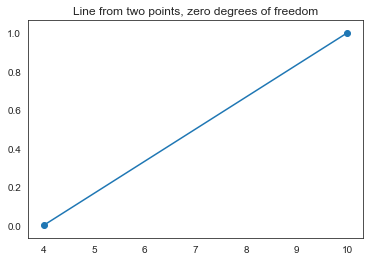

In [2]:
y = [0, 1]
x = [4, 10]
plt.scatter(x, y)
plt.plot(x, y)
plt.title('Line from two points, zero degrees of freedom')
plt.show()

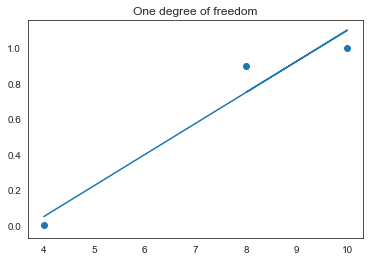

In [3]:
y=[0, 1, .9]
x=[4, 10, 8]
plt.scatter(x, y)
plt.plot(x, np.poly1d(np.polyfit(x, y, 1))(x))
plt.title('One degree of freedom')
plt.show()

In [4]:
# Read data into a DataFrame
data_url = 'https://tf-curricula-prod.s3.amazonaws.com/data-science/Advertising.csv'
data = pd.read_csv(data_url, index_col=0)
data.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [6]:
# Write out the model formula
# Your dependent variable on the right, independent variables on the left
# Use a ~ to represent an '=' from the functional form
linear_formula = 'Sales ~ TV+Radio+Newspaper'

# Fit the model to our data using the formula
lm = smf.ols(formula=linear_formula, data=data).fit()

In [7]:
lm.params

Intercept    2.938889
TV           0.045765
Radio        0.188530
Newspaper   -0.001037
dtype: float64

In [8]:
lm.pvalues

Intercept    1.267295e-17
TV           1.509960e-81
Radio        1.505339e-54
Newspaper    8.599151e-01
dtype: float64

In [9]:
lm.rsquared

0.8972106381789522

In [10]:
linear_formula_2 = 'Sales ~ TV+Radio'

lm2 = smf.ols(formula=linear_formula_2, data=data).fit()

In [12]:
lm2.params

Intercept    2.921100
TV           0.045755
Radio        0.187994
dtype: float64

In [13]:
lm2.pvalues

Intercept    4.565557e-19
TV           5.436980e-82
Radio        9.776972e-59
dtype: float64

In [15]:
lm2.rsquared

0.8971942610828956

In [16]:
lm.conf_int()

,0,1
Intercept,2.323762,3.554016
TV,0.043014,0.048516
Radio,0.171547,0.205513
Newspaper,-0.012616,0.010541


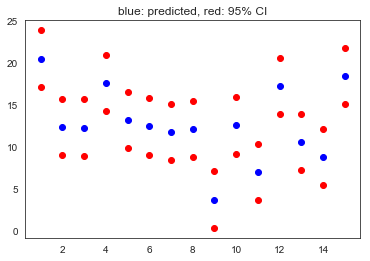

In [17]:
# Use wls_prediction_std to build confidence intervals
prstd, iv_1, iv_u = wls_prediction_std(lm)

plt.figure()
plt.plot(iv_u[0:15], 'o', color='r')
plt.plot(iv_1[0:15], 'o', color='r')
plt.plot(lm.fittedvalues[0:15], 'o', color='b')
plt.title('blue: predicted, red: 95% CI')
plt.show()
